In [1]:
import tensorflow as tf

2025-07-31 20:55:45.127740: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-31 20:55:45.365088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754009745.480792     528 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754009745.515937     528 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754009745.834261     528 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

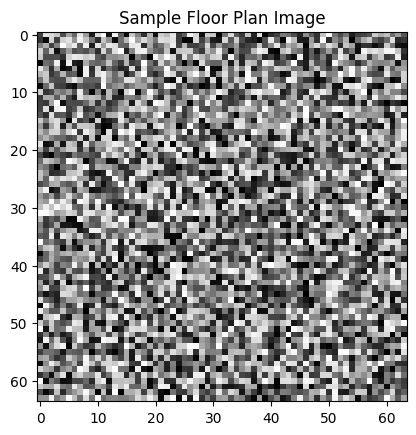

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy input: [area, bedrooms, bathrooms, garage]
input_vector = np.array([1000, 3, 2, 1])

# Dummy floor plan image (64x64 grayscale)
dummy_floor_plan = np.random.rand(64, 64)

plt.imshow(dummy_floor_plan, cmap='gray')
plt.title("Sample Floor Plan Image")
plt.show()


In [3]:
"""
from tensorflow.keras import layers, Model, Input

def build_generator(noise_dim=100, condition_dim=5):
    noise_input = Input(shape=(noise_dim,))
    condition_input = Input(shape=(condition_dim,))

    x = layers.Concatenate()([noise_input, condition_input])
    x = layers.Dense(8*8*128, activation='relu')(x)
    x = layers.Reshape((8, 8, 128))(x)

    x = layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', activation='relu')(x)
    x = layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', activation='sigmoid')(x)  # Output 32x32 or 64x64 grayscale image

    return Model([noise_input, condition_input], x)

generator = build_generator()
generator.summary()


SyntaxError: incomplete input (1043252414.py, line 1)

In [ ]:
"""
import tensorflow as tf

noise = tf.random.normal([1, 100])
condition = tf.constant(input_vector.reshape(1, -1), dtype=tf.float32)

generated_image = generator([noise, condition], training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.title("Generated Floor Plan Preview")
plt.show()


In [4]:
"""
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, LeakyReLU

image_input = Input(shape=(64, 64, 1))       # example grayscale image
condition_input = Input(shape=(5,))          # same condition vector

# Flatten the image and concatenate
x = Flatten()(image_input)
x = Concatenate()([x, condition_input])

x = Dense(128)(x)
x = LeakyReLU(negative_slope=0.2)(x)
x = Dense(64)(x)
x = LeakyReLU(negative_slope=0.2)(x)
output = Dense(1, activation='sigmoid')(x)

discriminator = Model([image_input, condition_input], output)
discriminator.compile(loss='binary_crossentropy', optimizer='adam')


SyntaxError: incomplete input (1424710698.py, line 1)

In [5]:
"""
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten, Dropout, Dense

# Define input shape (assuming grayscale 64x64 images)
img_shape = (64, 64, 1)

def build_discriminator():
    model = Sequential()

    # Conv layer 1
    model.add(Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=img_shape))
    model.add(LeakyReLU(negative_slope=0.2))

    # Conv layer 2
    model.add(Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(Dropout(0.3))

    # Conv layer 3
    model.add(Conv2D(256, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(Dropout(0.3))

    # Fully connected output
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))  # Output: probability that the input is real

    return model

# Create the model
discriminator = build_discriminator()
discriminator.summary()


SyntaxError: incomplete input (1904138407.py, line 1)

In [17]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the metadata
df = pd.read_csv("house_plans_details.csv")  # Adjust to actual CSV filename

# Optional: inspect it
print(df.head())

# Define image size
IMG_SIZE = (128, 128)

# Extract features and labels
def load_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

images = []
tabular_data = []

for i, row in df.iterrows():
    img_path = row['Image Path']
    if os.path.exists(img_path):
        images.append(load_image(img_path))
        # Use the numeric features: Square Feet, Beds, Baths, Garages
        tabular_data.append([row['Square Feet'], row['Beds'], row['Baths'], row['Garages']])
    else:
        print(f"Missing image: {img_path}")

"""

# Convert to arrays
images = np.array(images)
tabular_data = np.array(tabular_data)

# Normalize tabular data
scaler = StandardScaler()
tabular_data = scaler.fit_transform(tabular_data)

# Optional: split into train/test
X_img_train, X_img_test, X_tab_train, X_tab_test = train_test_split(images, tabular_data, test_size=0.2, random_state=42)
"""


   Square Feet  Beds  Baths  Garages      Image Path
0       3041.0   3.0    2.5      2.0  images/0_1.jpg
1        784.0   1.0    1.0      1.0  images/0_2.jpg
2       2486.0   3.0    2.5      1.0  images/0_3.jpg
3       2220.0   3.0    2.0      1.0  images/0_4.jpg
4       3776.0   3.0    3.5      1.0  images/0_5.jpg


'\n\n# Convert to arrays\nimages = np.array(images)\ntabular_data = np.array(tabular_data)\n\n# Normalize tabular data\nscaler = StandardScaler()\ntabular_data = scaler.fit_transform(tabular_data)\n\n# Optional: split into train/test\nX_img_train, X_img_test, X_tab_train, X_tab_test = train_test_split(images, tabular_data, test_size=0.2, random_state=42)\n'

In [4]:

# Convert to arrays
images = np.array(images)
tabular_data = np.array(tabular_data)

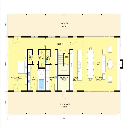

In [19]:
from PIL import Image
images[15].show()

In [15]:
images[13]

0

In [7]:
!pip install scikit-learn


In [1]:
from tensorflow.keras import layers, Model, Input

def build_discriminator(img_shape=(64, 64, 3), condition_dim=4):
    # Image branch
    img_input = Input(shape=img_shape, name="image_input")
    x = layers.Conv2D(64, kernel_size=4, strides=2, padding="same")(img_input)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(128, kernel_size=4, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(256, kernel_size=4, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Flatten()(x)
    img_features = layers.Dense(128)(x)

    # Condition (tabular) branch
    cond_input = Input(shape=(condition_dim,), name="condition_input")
    y = layers.Dense(64)(cond_input)
    y = layers.LeakyReLU(0.2)(y)
    y = layers.Dense(128)(y)
    y = layers.LeakyReLU(0.2)(y)

    # Combine both branches
    combined = layers.Concatenate()([img_features, y])
    z = layers.Dense(256)(combined)
    z = layers.LeakyReLU(0.2)(z)
    z = layers.Dropout(0.3)(z)
    z = layers.Dense(1, activation='sigmoid')(z)  # output: real/fake

    discriminator = Model([img_input, cond_input], z, name="discriminator")
    return discriminator


2025-09-21 18:54:01.179064: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-21 18:54:01.218597: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758495241.240093     517 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758495241.246386     517 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758495241.267711     517 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:

discriminator = build_discriminator()
#discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
discriminator.summary()


I0000 00:00:1758495259.376399     517 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      3,136 │ image_input[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 32, 32,    │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │    131,200 │ leaky_re_lu[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 16,    │        512 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 256) │    524,544 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition_input     │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 256) │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │        320 │ condition_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 8, 8, 256) │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 64)        │          0 │ dense_1[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 16384)     │          0 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │      8,320 │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  2,097,280 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 128)       │          0 │ dense_2[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ leaky_re_lu_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │     65,792 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 256)       │          0 │ dense_3[0][0]   

 Total params: 2,832,385 (10.80 MB)

 Trainable params: 2,831,617 (10.80 MB)

 Non-trainable params: 768 (3.00 KB)

In [30]:
def build_generator(noise_dim=100, condition_dim=4):
    noise_input = Input(shape=(noise_dim,), name="noise_input")
    condition_input = Input(shape=(condition_dim,), name="condition_input")

    x = layers.Concatenate()([noise_input, condition_input])
    x = layers.Dense(8 * 8 * 256, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Reshape((8, 8, 256))(x)

    x = layers.Conv2DTranspose(128, 4, strides=2, padding='same', use_bias=False)(x)  # 16x16
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2DTranspose(64, 4, strides=2, padding='same', use_bias=False)(x)  # 32x32
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2DTranspose(32, 4, strides=2, padding='same', use_bias=False)(x)  # 64x64
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2DTranspose(3, 4, strides=2, padding='same', use_bias=False, activation='sigmoid')(x)  # 128x128

    return Model([noise_input, condition_input], x, name="generator")


In [31]:
"""
\generator = build_generator()
generator.summary()




SyntaxError: incomplete input (31918596.py, line 1)

In [32]:
def build_gan_model(generator, discriminator):
    # Freeze the discriminator during generator training
    discriminator.trainable = False

    noise_input = Input(shape=(100,), name="noise_input")
    condition_input = Input(shape=(4,), name="condition_input")

    generated_image = generator([noise_input, condition_input])
    validity = discriminator([generated_image, condition_input])

    model = Model(inputs=[noise_input, condition_input], outputs=validity, name="cGAN")
    return model


In [33]:
generator = build_generator()
discriminator = build_discriminator()
gan_model = build_gan_model(generator, discriminator)
gan_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))


In [12]:
"""

# Generate noise
noise_sample = tf.random.normal((1, 100))  # Already a tensor

# Example condition vector (already normalized)
condition_np = np.array([[2500, 3, 2.5, 2]])
condition_np = scaler.transform(condition_np)

# ✅ Convert condition to a Tensor
condition_tensor = tf.convert_to_tensor(condition_np, dtype=tf.float32)

# ✅ Now both are tensors – safe to pass into the model
generated_image = generator([noise_sample, condition_tensor])



I0000 00:00:1754009784.447555     528 cuda_dnn.cc:529] Loaded cuDNN version 90300


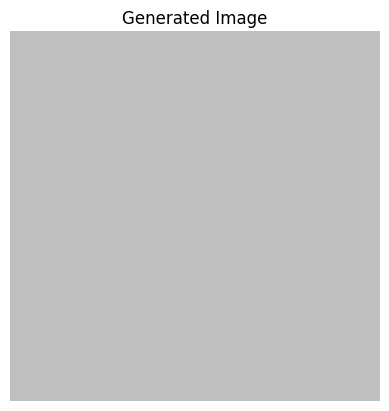

In [13]:
import matplotlib.pyplot as plt

# Convert tensor to numpy and remove batch dimension
img = generated_image.numpy()[0]

# If your image is in range [-1, 1], rescale to [0, 1] for display
img = (img + 1) / 2.0

# Display the image
plt.imshow(img)
plt.axis("off")
plt.title("Generated Image")
plt.show()


In [14]:
discriminator.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)


In [37]:


# Freeze the discriminator during generator training
discriminator.trainable = False

# Inputs
noise_input = Input(shape=(100,), name="noise_input")          # latent noise
condition_input = Input(shape=(4,), name="condition_input")    # tabular features

# Generator output (pass both noise and condition)
generated_image = generator([noise_input, condition_input])

# Discriminator evaluates the generated image with condition
gan_output = discriminator([generated_image, condition_input])

# Combined GAN model
gan_model = Model(inputs=[noise_input, condition_input], outputs=gan_output, name="cGAN")

# Compile the GAN
gan_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)


In [34]:
def train_gan(generator, discriminator, build_gan_model, tabular_data, real_images, epochs=100, batch_size=32, noise_dim=100):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # === Train Discriminator ===
        # Select a random half batch of real images and corresponding tabular data
        idx = np.random.randint(0, real_images.shape[0], half_batch)
        real_imgs = real_images[idx]
        condition_data = tabular_data[idx]

        # Generate a half batch of fake images
        noise = np.random.normal(0, 1, (half_batch, noise_dim))
        gen_imgs = generator.predict([noise, condition_data])

        # Train discriminator
        discriminator.trainable = True
        d_loss_real = discriminator.train_on_batch([real_imgs, condition_data], np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch([gen_imgs, condition_data], np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # === Train Generator ===
        # Generate noise and condition data for a full batch
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        condition_data = tabular_data[np.random.randint(0, tabular_data.shape[0], batch_size)]

        # Freeze discriminator for generator training
        discriminator.trainable = False
        gan_model = build_gan_model(generator, discriminator)  # Rebuild with frozen discriminator
        gan_model.compile(optimizer='adam', loss='binary_crossentropy')

        # Try to fool the discriminator
        valid_y = np.ones((batch_size, 1))
        g_loss = gan_model.train_on_batch([noise, condition_data], valid_y)

        # === Logging ===
        print(f"{epoch+1}/{epochs} | D loss: {d_loss:.4f} | G loss: {g_loss:.4f}")


In [35]:
def to_scalar(x):
    import numpy as np
    if isinstance(x, (list, tuple)):
        return float(x[0])  # list or tuple: take first element
    elif isinstance(x, np.ndarray):
        if x.ndim == 0:  # scalar numpy array
            return float(x)
        else:
            return float(x[0])
    else:
        return float(x)


In [38]:
train_gan(generator, discriminator, build_gan_model, X_tab_train, X_img_train, epochs=100, batch_size=32)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


ValueError: You must call `compile()` before using the model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


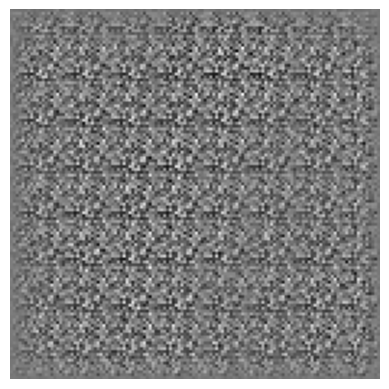

In [21]:
import numpy as np
import matplotlib.pyplot as plt

noise_dim = 100
condition_dim = 4

# Generate noise
noise = np.random.normal(0, 1, (1, noise_dim))

# Condition vector (4 elements): example - area, bedrooms, living rooms, kitchens
condition = np.array([[64, 3, 1, 0]], dtype=np.float32)

# Generate image
generated_img = generator.predict([noise, condition])

# Remove batch and channel dims
img = generated_img[0, :, :, 0]

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
